In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn for Task-1
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model Evaluations for task1
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Models from Scikit-Learn fot Task-2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [3]:
# Reading the csv files
df=pd.read_csv('avacado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration (exploratory data analysis or EDA)

In [4]:
#we can drop "Unnamed: 0" column as it is just a Serial number
df.drop(columns=["Unnamed: 0"],inplace=True)

In [5]:
#Display The head ==> To Check if Data is Properly Imported
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [6]:
#lets check the datatypes
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [7]:
#To check the shape of the dataset
df.shape # (rows, columns)

(16468, 13)

In [8]:
#features in data
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
#data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null float64
region          1517 non-null object
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [10]:
# Are there any missing values?
df.isna().sum()


Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [11]:
df.dropna(inplace=True)

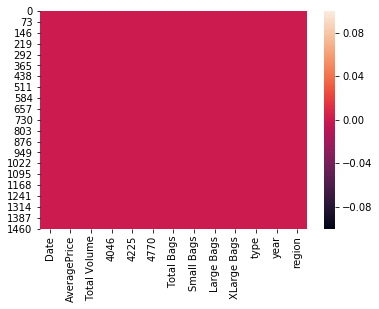

In [12]:
#heatmap for null values
sns.heatmap(df.isnull())

In [13]:
#Lets describe the dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


mean is higher than the median, which means  data is right skewed and ouliers are present

In [14]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of Date : 104
number of unique valuse of AveragePrice : 113
number of unique valuse of Total Volume : 1517
number of unique valuse of 4046 : 1517
number of unique valuse of 4225 : 1517
number of unique valuse of 4770 : 1516
number of unique valuse of Total Bags : 1517
number of unique valuse of Small Bags : 1517
number of unique valuse of Large Bags : 1377
number of unique valuse of XLarge Bags : 711
number of unique valuse of type : 1
number of unique valuse of year : 2
number of unique valuse of region : 51


In [15]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


In [16]:
#convert datetime object into Date type
df['Date']= pd.to_datetime(df['Date'])
#coverting date into month and day format
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,10,16
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,9,10
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,2,10
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,9,25


# Univarient  analysis

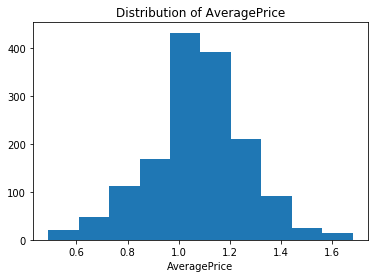

In [17]:
# matplotlib plots inline  
%matplotlib inline

# Plotting distribution of wins
plt.hist(df['AveragePrice'])
plt.xlabel('AveragePrice')
plt.title('Distribution of AveragePrice')

plt.show()


Here we can see that the weight is in the price range of 440

Text(0.5, 6.79999999999999, 'year')

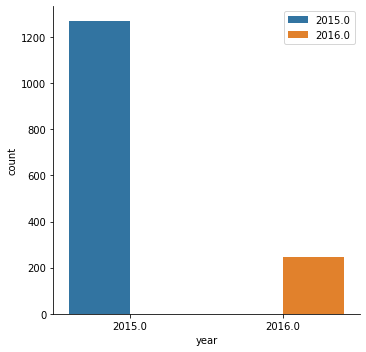

In [18]:
#Lets check the count of each year
%matplotlib inline
sns.catplot(x='year',data=df,kind='count',hue='year')
plt.legend()
plt.xlabel("year")

We can see that most of the avacado sold in 2015 as compared to 2016 


AveragePrice       AxesSubplot(0.125,0.772143;0.168478x0.107857)
Total Volume    AxesSubplot(0.327174,0.772143;0.168478x0.107857)
4046            AxesSubplot(0.529348,0.772143;0.168478x0.107857)
4225            AxesSubplot(0.731522,0.772143;0.168478x0.107857)
4770               AxesSubplot(0.125,0.642714;0.168478x0.107857)
Total Bags      AxesSubplot(0.327174,0.642714;0.168478x0.107857)
Small Bags      AxesSubplot(0.529348,0.642714;0.168478x0.107857)
Large Bags      AxesSubplot(0.731522,0.642714;0.168478x0.107857)
XLarge Bags        AxesSubplot(0.125,0.513286;0.168478x0.107857)
year            AxesSubplot(0.327174,0.513286;0.168478x0.107857)
Month           AxesSubplot(0.529348,0.513286;0.168478x0.107857)
Day             AxesSubplot(0.731522,0.513286;0.168478x0.107857)
dtype: object

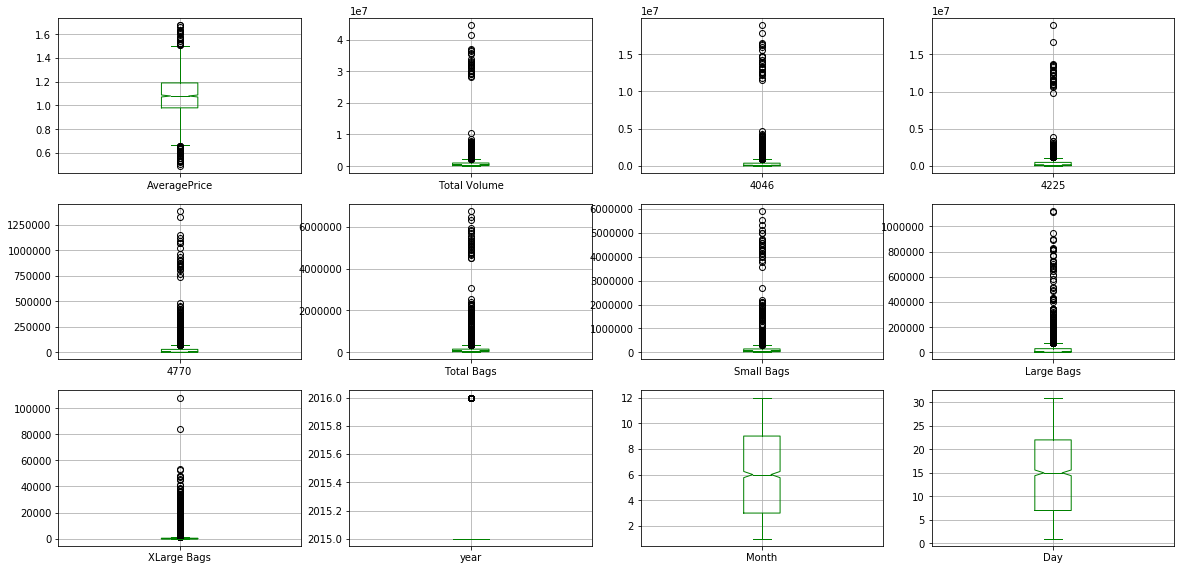

In [19]:
# Plotting the boxplot in order to check few statistical values and outliers
df.drop(['Date'],axis=1).plot(kind='box', subplots=True, layout=(6,4),figsize=(20,20),grid=True,notch=True,color='green' ,legend=True)

lots of outliers are present

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A14B9A6608>,
      dtype=object)

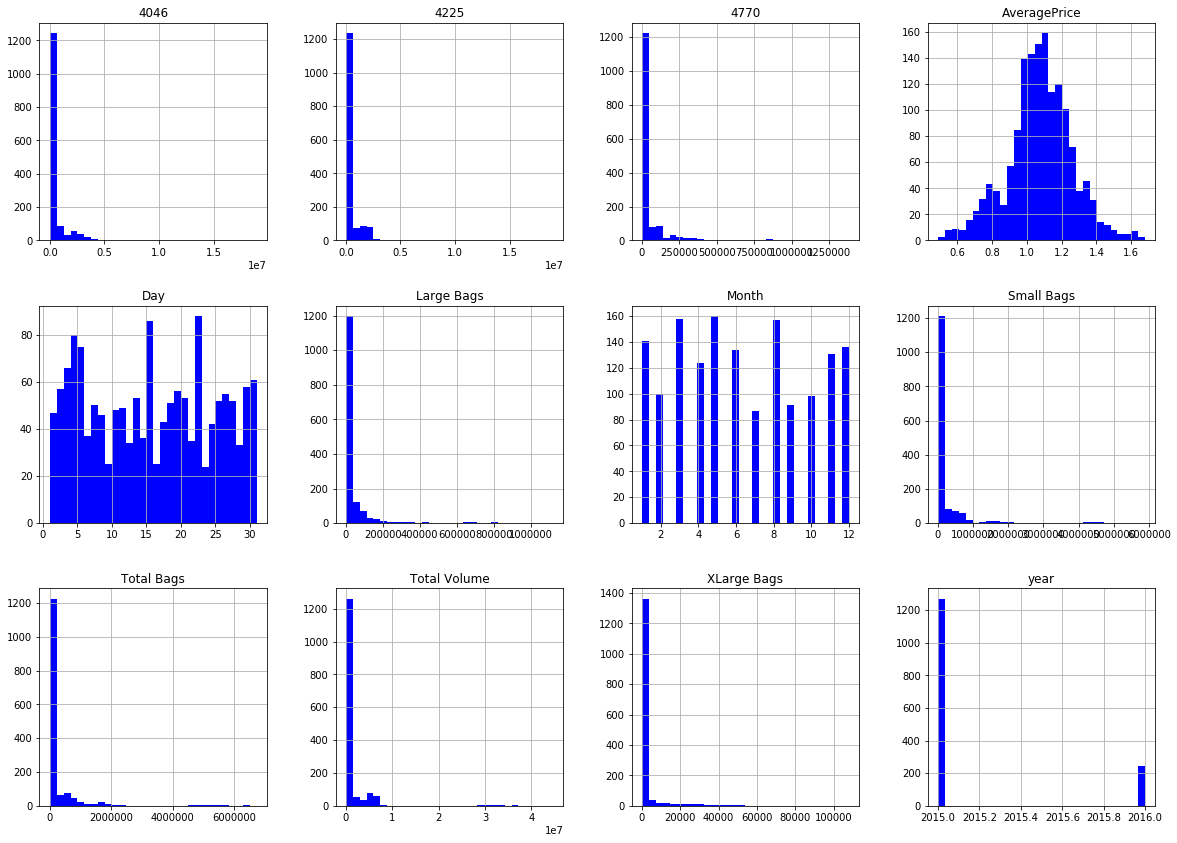

In [20]:
#plotting histograms for checking normal distribution
df.hist(figsize=(20,30),grid=True,layout=(6,4),bins=30,color='blue')

# Bivarient  Analysis

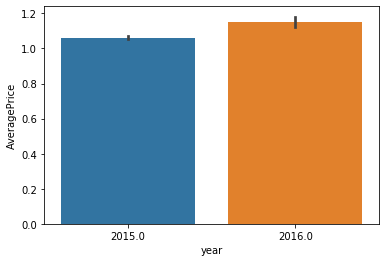

In [21]:
#lets check in which year average Price is more
sns.barplot(x='year',y="AveragePrice",data=df);


in 2016 average price is more compared to 2015

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

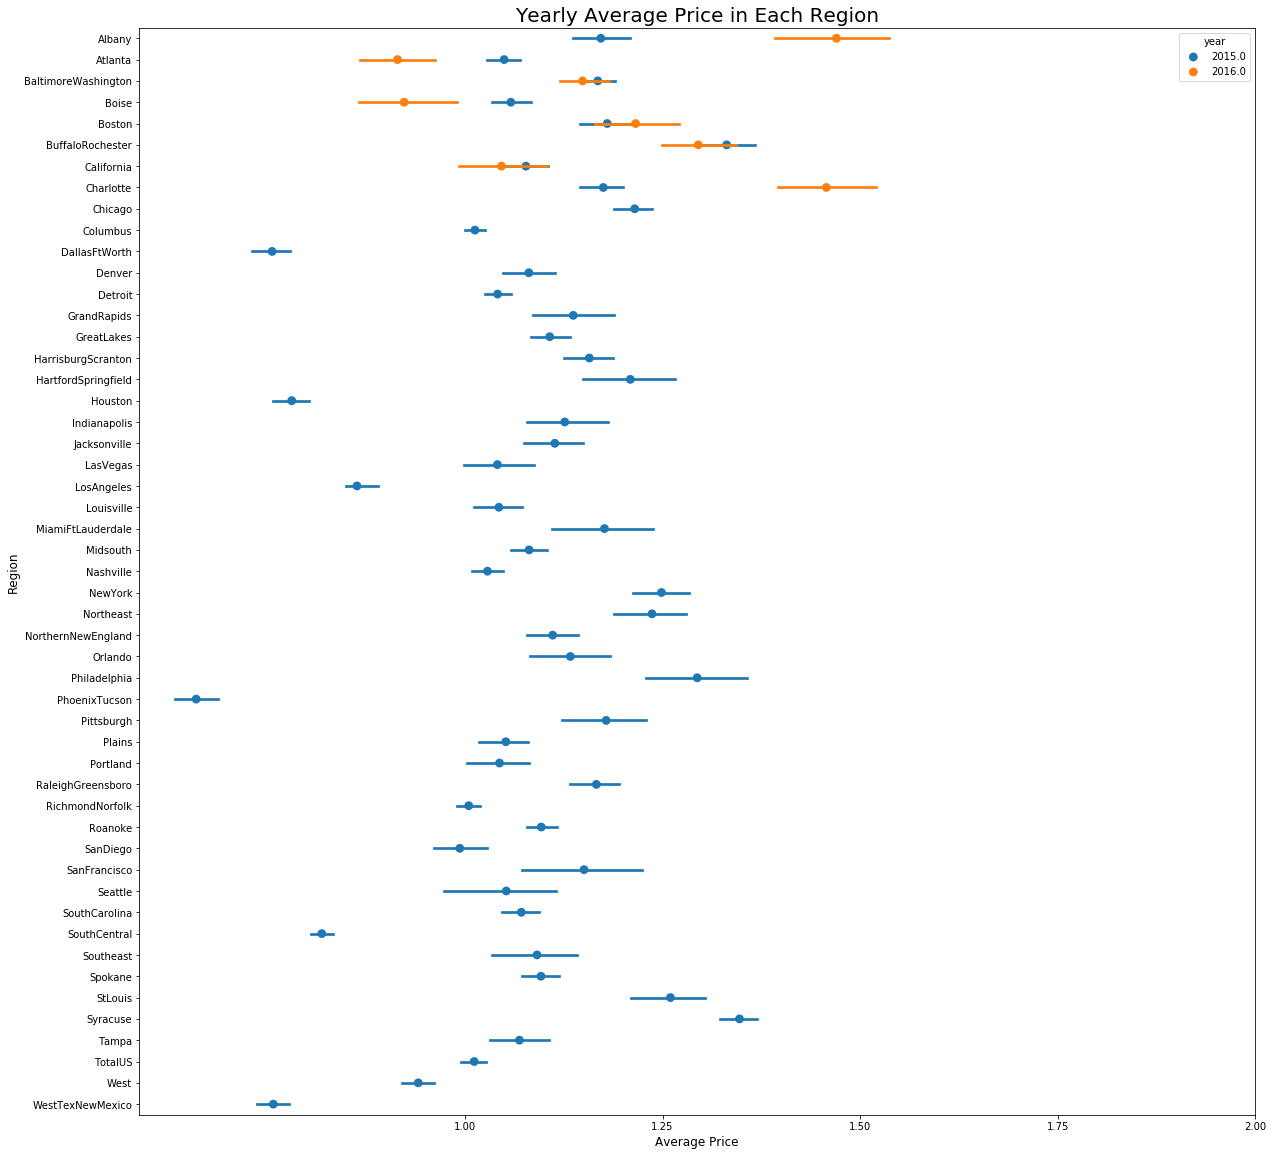

In [22]:
#lets check in which region the average Price is more yearly
plt.figure(figsize=(20,20))
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.ylabel('Region',{'fontsize' : 'large'})
plt.xlabel('Average Price',{'fontsize':'large',})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

*Maximum value of average price in 2015 is in Syracuse.
*Maximum value of average price in 2016 is in Albany.
*Minimum value of average price in 2015 is in PhoenixTucson.
*Minimum value of average price in 2016 is in Atlanta.
*So average price is maximum in 2016 is in Albany compared to 2015 year
*So average price is minimum in 2016 is in PhoenixTucson compared to 2015 year

Text(0.5, 1.0, 'Monthly Average Price in Each Region')

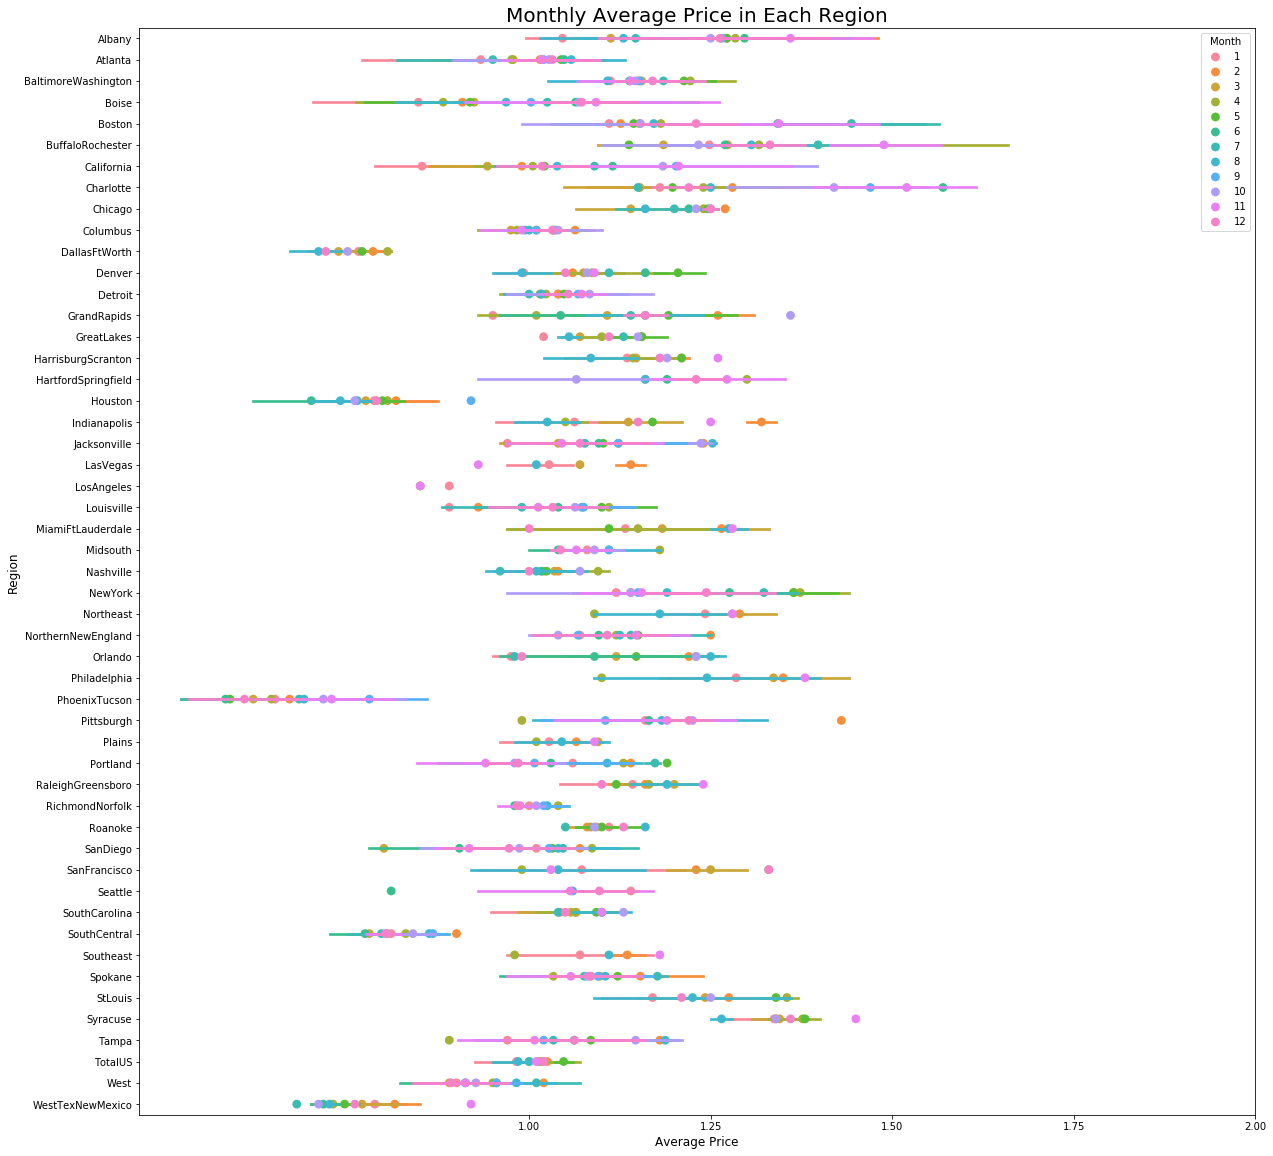

In [23]:
#lets check in which region the average Price is more monthly
plt.figure(figsize=(20,20))
sns.pointplot(x='AveragePrice',y='region',data=df, hue='Month',join=False)
plt.xticks(np.linspace(1,2,5))
plt.ylabel('Region',{'fontsize' : 'large'})
plt.xlabel('Average Price',{'fontsize':'large',})
plt.title("Monthly Average Price in Each Region",{'fontsize':20})

average price is more in month of june in charlotte

Text(0.5, 1.0, 'Monthly Average Price in Each year')

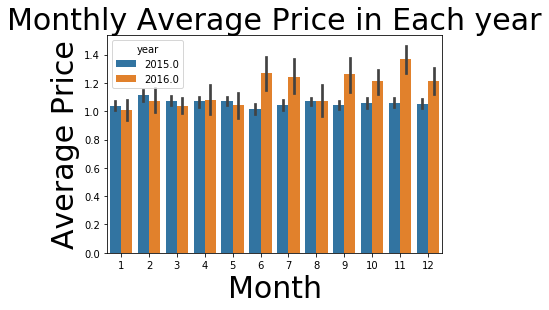

In [24]:
#lets check in which month the average Price is more yearly
sns.barplot(x='Month',y='AveragePrice',data=df,hue='year')
plt.xlabel('Month',{'fontsize' : 30})
plt.ylabel('Average Price',{'fontsize':30,})
plt.title("Monthly Average Price in Each year",{'fontsize':30})

In 2015 February is the month in which average price is more than rest.
In 2015 November is the month in which average price is more than rest.

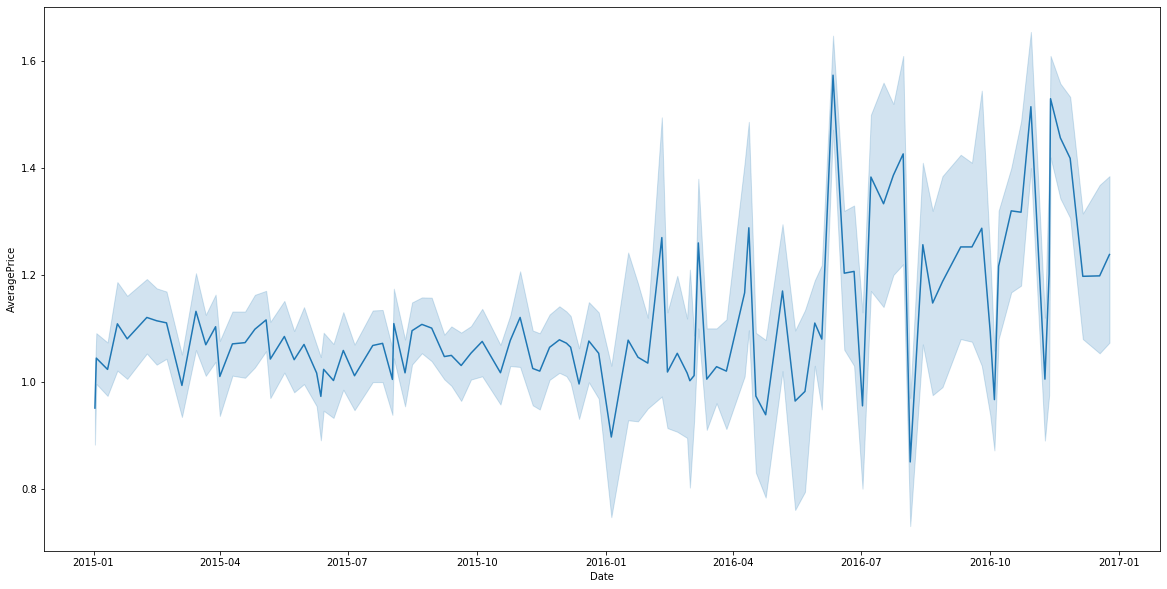

In [25]:
#date vs average price
plt.figure(figsize=(20,10))
sns.lineplot(y='AveragePrice',x='Date',data=df)

avocado use is increasing day by day and is mostly used in month of june 2016.

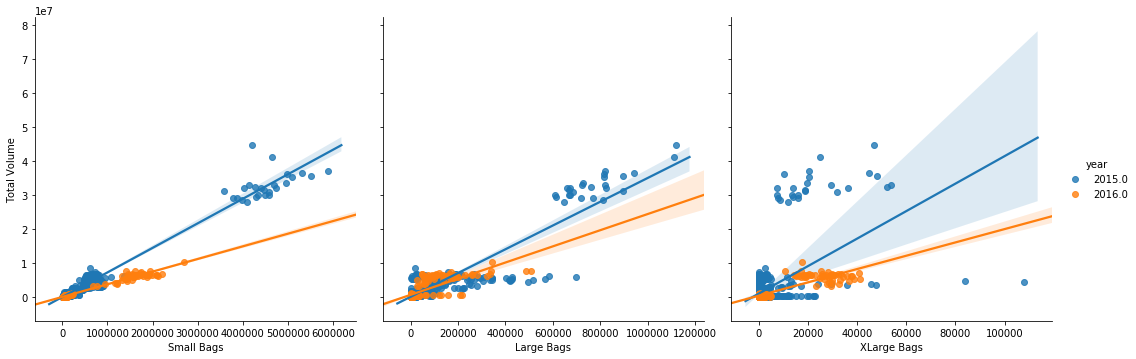

In [26]:
#total volume vs with different types of bags
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg',hue='year')

Strong co-relation between Total Volume Vs all Bag( Small Bags', 'Large Bags', 'XLarge Bags)
Large and xl bags don't have strong correlation in year 2015.



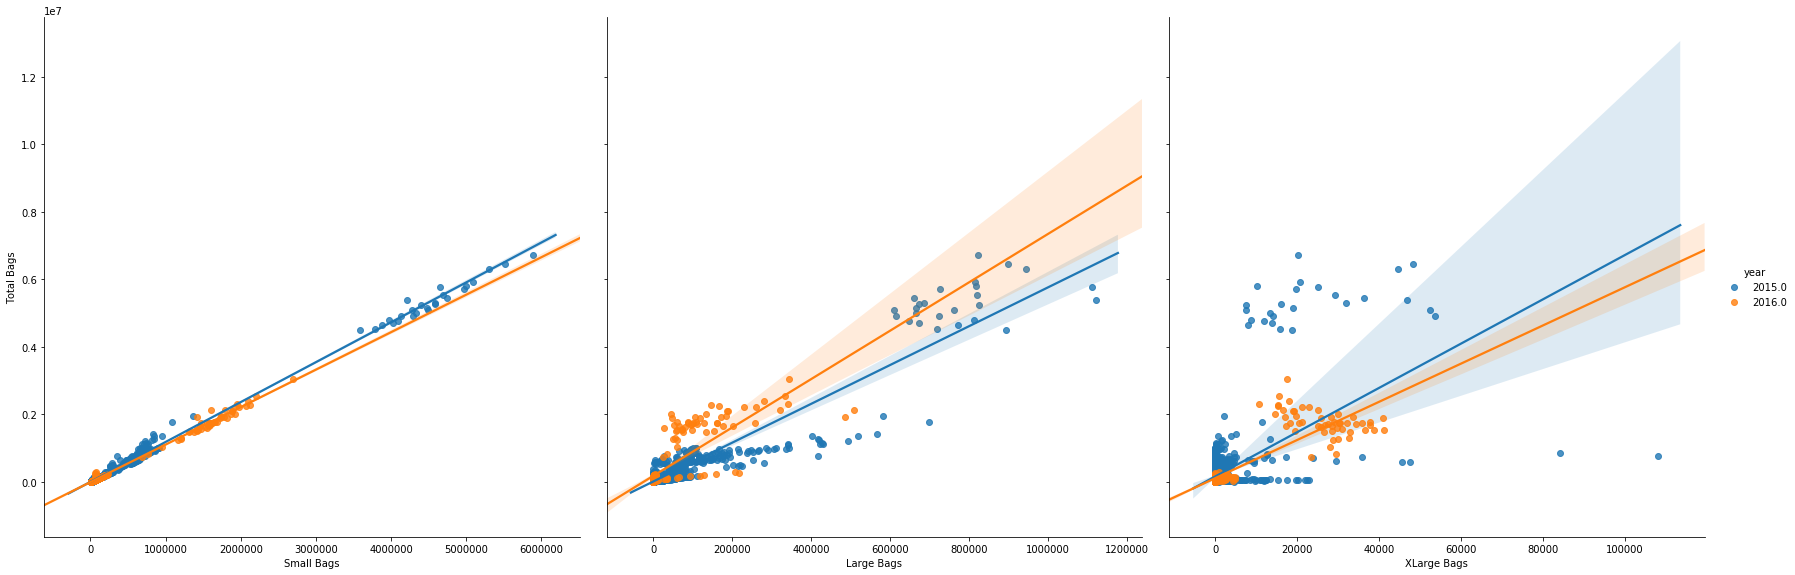

In [27]:
#total bags vs with different types of bags 
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=8, aspect=1, kind='reg',hue='year')

Strong co-relation between Total Bags Vs all Bag( Small Bags', 'Large Bags', 'XLarge Bags)


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

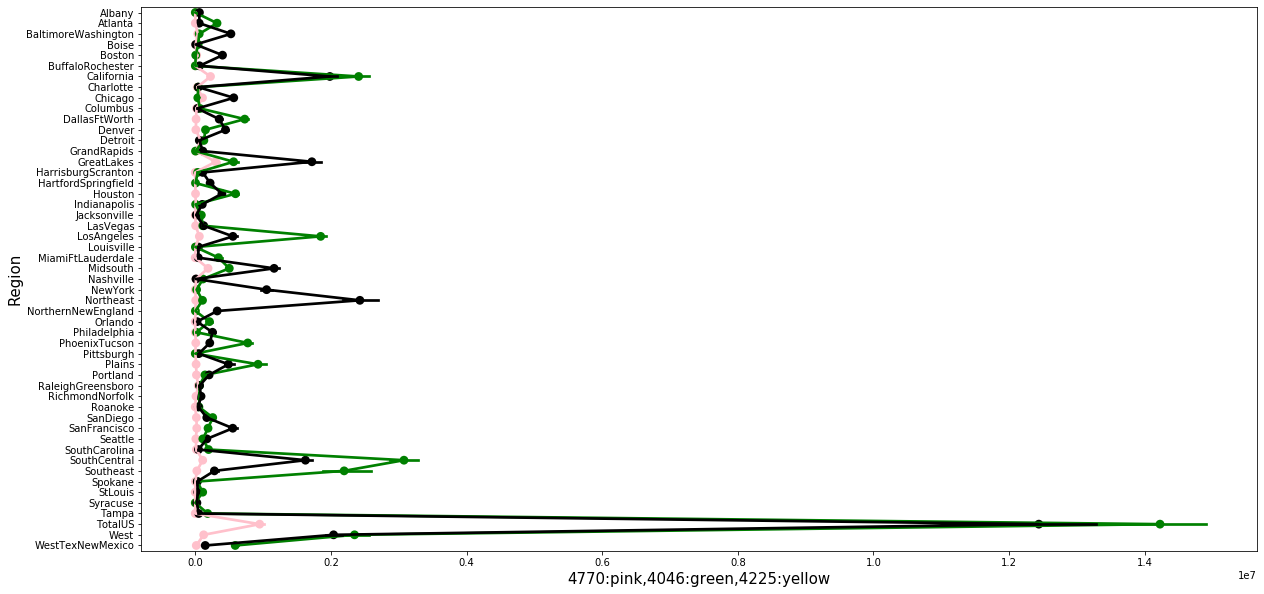

In [28]:
#lets chech region vs PLU codes(4770,4046,4225)
plt.figure(figsize=(20,10))
sns.pointplot(x='4770',y='region',data=df,color="pink",dodge=True)
sns.pointplot(x='4046',y='region',data=df,color="green",dodge=True)
sns.pointplot(x='4225',y='region',data=df,color="black",dodge=True)
plt.ylabel('Region' ,fontsize=15)
plt.xlabel('4770:pink,4046:green,4225:yellow' ,fontsize=15)
plt.tight_layout

Highest number of Avocados with PLU code(4046,are consumed in TotalUS region).

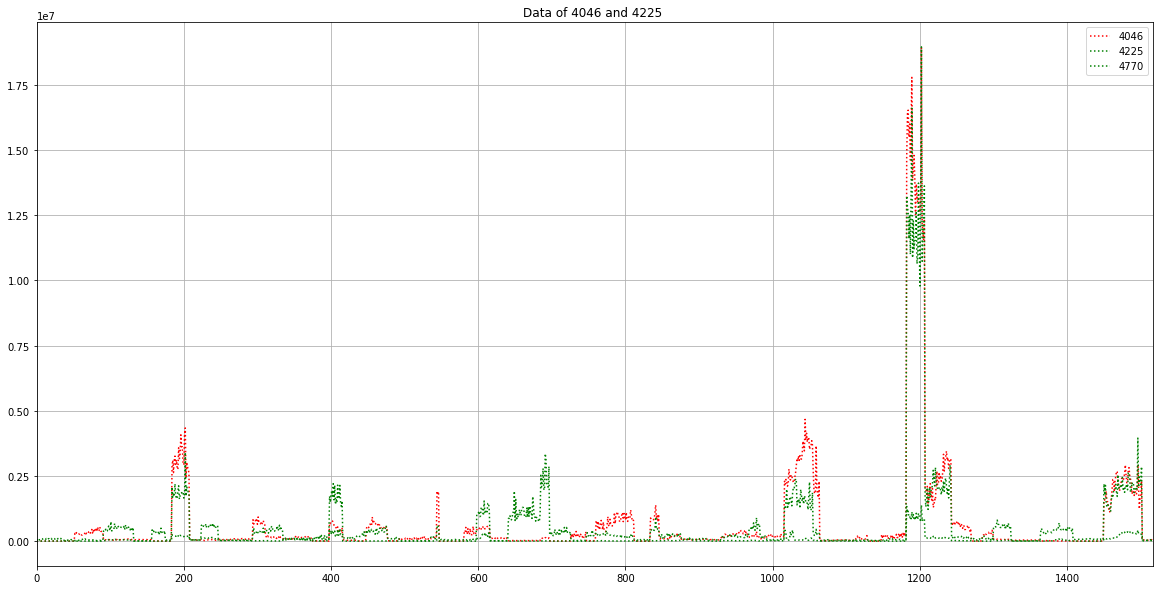

In [29]:
# Total number of avocados with PLU 4046 sold
# Total number of avocados with PLU 4225 sold
# Total number of avocados with PLU 4770 sold

df["4046"].plot(kind="line",color="red",linestyle=":",label="4046",grid=True,figsize=(20,10))
df["4225"].plot(kind="line",color="green",linestyle=":",label="4225",grid=True,figsize=(20,10))
df["4770"].plot(kind="line",color="green",linestyle=":",label="4770",grid=True,figsize=(20,10))
plt.legend()
plt.title("Data of 4046 and 4225 ")
plt.show()

In [30]:
# using Label Encoding to change the value in binary format
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['type','region']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [31]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [32]:
# Now we've enriched our DataFrame with date time features, we can remove 'Date'
df.drop(['Date'],axis=1,inplace=True)

In [33]:
#lets remove the skewness
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [34]:
#lets again check the skewness
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

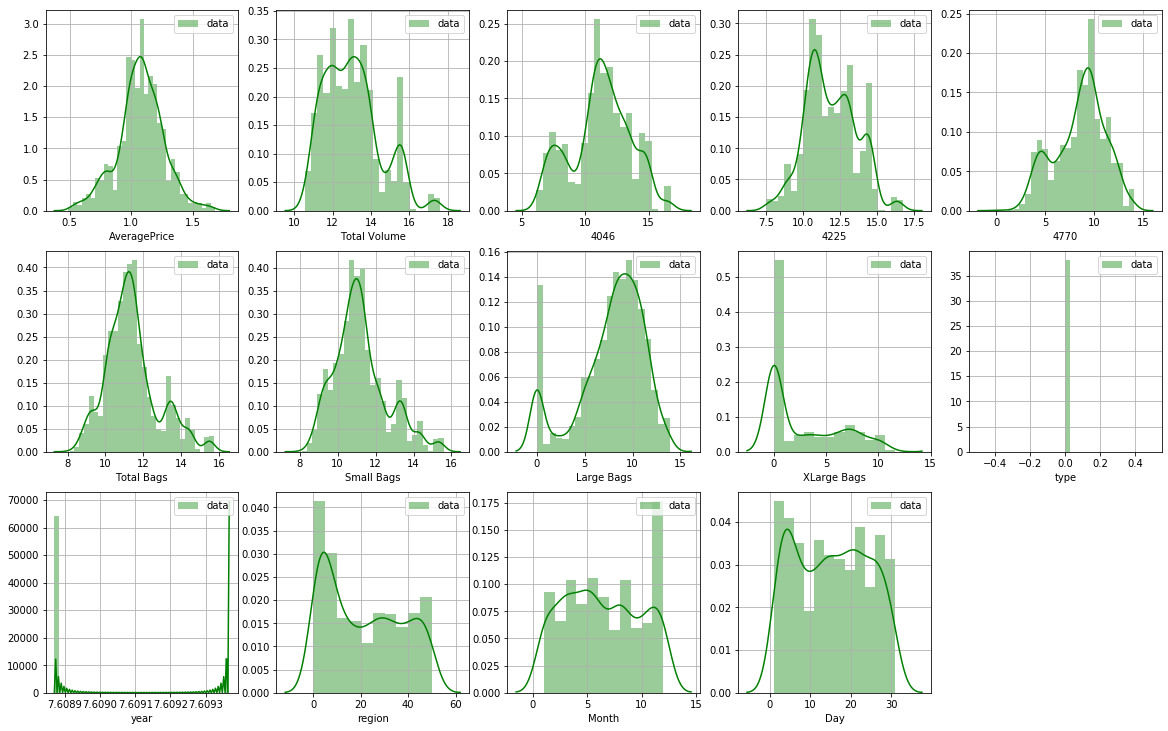

In [35]:
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,17))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

(14.0, 0.0)

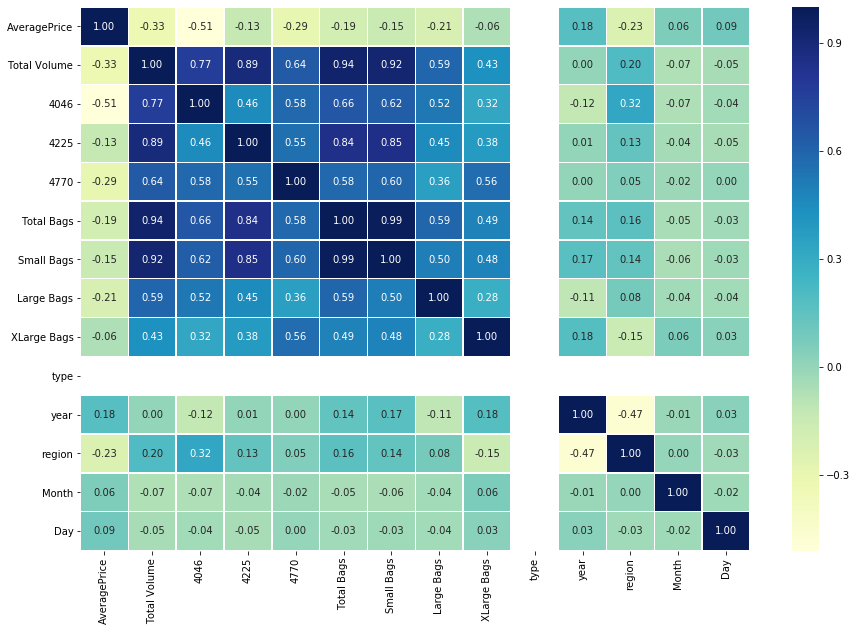

In [36]:
# Plotting Heatmap for Correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [37]:
#type have no correlation with target  so we can drop it
df.drop("type",axis=1,inplace=True)

# Modelling for task-1

In [38]:
# Split data into X and y
X = df.drop(["AveragePrice"], axis=1)

y = df["AveragePrice"]

In [39]:
# Independent variables (no target column)
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,7.608871,0,12,27
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,7.608871,0,12,20
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,7.608871,0,12,13
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,7.608871,0,6,12
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,7.608871,0,11,29


In [40]:
# Target variable
y


0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [41]:
#checking shape of input variable
X.shape

(1517, 12)

In [42]:
#checking shape of target variable
y.shape

(1517,)

In [43]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,-1.356762,-1.828162,-0.567524,-1.810613,-1.684725,-1.539248,-0.966743,-0.810775,-0.441008,-1.314338,1.624154,1.310530
1,-1.466387,-2.012069,-0.684233,-1.737594,-1.620123,-1.474983,-0.953861,-0.810775,-0.441008,-1.314338,1.624154,0.529537
2,-0.932139,-1.941834,-0.159241,-1.428526,-1.732326,-1.587763,-0.937531,-0.810775,-0.441008,-1.314338,1.624154,-0.251456
3,-1.212820,-1.790572,-0.403726,-1.654003,-1.977653,-1.838106,-0.862073,-0.810775,-0.441008,-1.314338,-0.104453,-0.363027
4,-1.516851,-1.869374,-0.694856,-1.637471,-1.932480,-1.800022,-0.748414,-0.810775,-0.441008,-1.314338,1.336053,1.533671
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-0.598749,-0.109561,-0.547264,0.471494,-0.288452,-0.291023,0.408973,0.753079,2.267532,-0.880286,1.047952,0.083255
1513,-0.646336,-0.230919,-0.592472,0.511204,-0.242463,-0.209250,0.354507,-0.810775,2.267532,-0.880286,0.759850,-0.586168
1514,-0.645653,-0.201904,-0.584607,0.453477,-0.252693,-0.227507,0.342751,1.103891,2.267532,-0.880286,-1.256858,-0.586168
1515,-0.605031,-0.135779,-0.576885,0.470688,-0.235255,-0.196878,0.343463,-0.810775,2.267532,-0.880286,0.759850,1.087389


In [44]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_random_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [45]:

models = {"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=18),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "SVR":SVR(),
          "RandomForestRegressor":RandomForestRegressor(max_depth=2, random_state=0),
          "GradientBoostingClassifier":GradientBoostingRegressor(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "ElasticNet":ElasticNet(),
          "XGBRegressor":XGBRegressor()
         }
# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        r_state=max_random_score(model)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.22)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [46]:
model_scores = fit_and_score(models=models)

model_scores


max r2 score corresponding to 60 is: 0.6277852686344151
max r2 score corresponding to 75 is: 0.7585231598978176
max r2 score corresponding to 89 is: 0.4582239125063938
max r2 score corresponding to 43 is: 0.7391064864163024
max r2 score corresponding to 92 is: 0.4978341544790926
max r2 score corresponding to 60 is: 0.7849326893368654
max r2 score corresponding to 0 is: 0
max r2 score corresponding to 89 is: 0.45531775132433616
max r2 score corresponding to 0 is: 0
max r2 score corresponding to 43 is: 0.8710701813213186


{'KNeighborsRegressor': 0.5957462588207981,
 'SVR': 0.7906377889207985,
 'LR': 0.3696666341057101,
 'DecisionTreeRegressor': 1.0,
 'RandomForestRegressor': 0.43399904380047444,
 'GradientBoostingClassifier': 0.8495106533366659,
 'Lasso': 0.0,
 'Ridge': 0.3694798137439612,
 'ElasticNet': 0.0,
 'XGBRegressor': 0.9990095416145854}

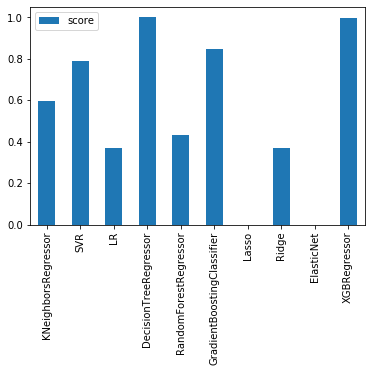

In [47]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [48]:
#Defining Instances For Differnt Models.
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
XGBRegressor=XGBRegressor()
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGBRegressor))

Model=[]
Score=[]
R2_score=[]
cvs=[]
mae=[]
mse=[]
Rmse=[]

# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
#   For Loop to Calculate R_2 Score, Cross Val Score.
for name, model in models:
    Model.append(name)
    print(model)
    print('\n')
    r_state=max_random_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error=',Meanabsoluteerror)
    mae.append(Meanabsoluteerror*100)
    print('\n')
    Meansquarederror = mean_squared_error(y_test, y_pred)
    print('Mean squared error=',Meansquarederror)
    mse.append(Meansquarederror*100)
    print('\n')
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean squared error=',RootMeansquarederror)
    Rmse.append(RootMeansquarederror*100)
    print('\n')

        


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 60 is: 0.7248090642727656
R2 Score :  0.7248090642727656


Cross_val_score= 0.1502111272123168


Mean absolute error= 0.08410179640718561


Mean squared error= 0.01172508982035928


Root Mean squared error= 0.10828245388962739


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


max r2 score corresponding to 75 is: 0.7585231598978176
R2 Score :  0.7585231598978176


Cross_val_score= 0.3112666581839272


Mean absolute error= 0.07509114094880666


Mean squared error= 0.009185438199020726


Root Mean squared error= 0.09584069177035778


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


max r2 score corresponding to 89 is: 0.458223912

In [49]:
result=pd.DataFrame({'Model':Model,'r2_score':R2_score,'Cross_val_score':cvs,'Mean absolute error':mae,'Mean squared error':mse,'Root Mean squared error':Rmse})
result

,Model,r2_score,Cross_val_score,Mean absolute error,Mean squared error,Root Mean squared error
0,KNeighborsRegressor,72.480906,15.021113,8.410180,1.172509,10.828245
1,SVR,75.852316,31.126666,7.509114,0.918544,9.584069
2,LinearRegression,45.822391,10.493764,10.538424,1.853579,13.614620
3,DecisionTreeRegressor,72.082584,-38.724287,7.035928,1.019461,10.096837
4,RandomForestRegressor,83.235365,12.698113,6.329940,0.710076,8.426601
5,GradientBoostingRegressor,78.480596,20.454574,7.403970,0.916880,9.575383
6,AdaBoostRegressor,64.149942,29.572457,9.610697,1.363686,11.677695
7,Lasso,-0.565823,-3.606102,15.065028,3.769756,19.415860
8,Ridge,45.531775,10.239951,10.554367,1.863522,13.651086
9,ElasticNet,-0.565823,-3.606102,15.065028,3.769756,19.415860


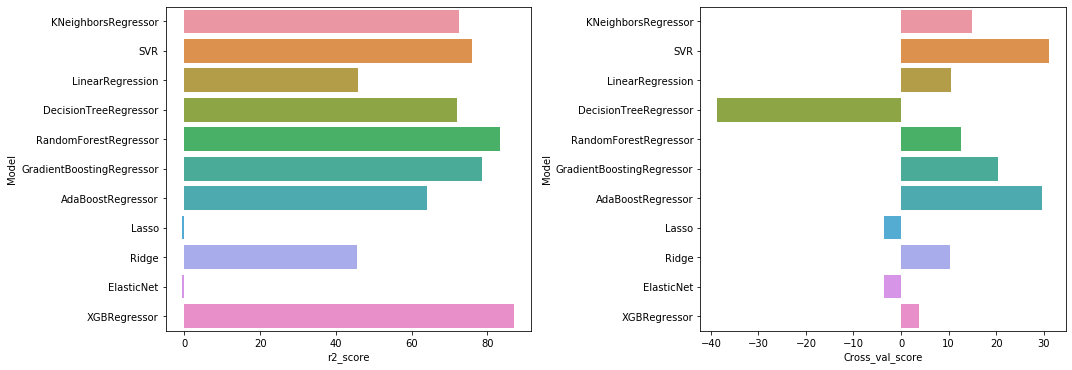

In [50]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'r2_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [51]:
#function to evatulate errors
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    r2score = r2_score(y_test, y_preds)
    Meanabsoluteerror = mean_absolute_error(y_test, y_preds)
    Meansquarederror = mean_squared_error(y_test, y_preds)
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_preds))
    metric_dict = {"r2score": round(r2score, 2),
                   "Mean absolute error": round(Meanabsoluteerror, 2),
                   "Mean squared error": round(Meansquarederror, 2), 
                   "Root Mean squared error": round(RootMeansquarederror, 2),
                   }
    print(f"r2score: {r2score * 100:.2f}%")
    print(f"Mean absolute error: {Meanabsoluteerror:.2f}")
    print(f"Mean squared error: {Meansquarederror:.2f}")
    print(f"Root Mean squared error: {RootMeansquarederror:.2f}")

    return metric_dict

In [52]:
#for getting best set of parameters for DecisionTreeRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
gridD = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

clfD = DecisionTreeRegressor()

# Setup GridSearchCV
gs_clfD = GridSearchCV(estimator=clfD,
                      param_grid=gridD,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clfD.fit(x_train, y_train);

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:    5.0s finished


In [53]:
# best parameters for DecisionTreeRegressor
print("Best parameter:",gs_clfD.best_params_)
print("score:",gs_clfD.best_score_)

Best parameter: {'max_leaf_nodes': 73, 'min_samples_split': 2}
score: 0.6086505501529449


In [54]:
#checking r2 score using best parameters which calculated from gridsearchCV
dtc=DecisionTreeRegressor(max_leaf_nodes=73, min_samples_split= 2)
max_random_score(dtc)

max r2 score corresponding to 43 is: 0.7431882124583402


43

In [55]:
#for getting best set of parameters for GradientBoostingRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid1 = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}

clfD = GradientBoostingRegressor()

# Setup GridSearchCV
gs_clf1 = GridSearchCV(estimator=clfD,
                      param_grid=grid1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clf1.fit(x_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  80 | elapsed:    0.8s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.1s finished


In [56]:
# best parameters for GradientBoostingRegressor
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'learning_rate': 0.1, 'n_estimators': 1000}
score: 0.7786743018533725


In [57]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators= 1000)
max_random_score(gbr)

max r2 score corresponding to 60 is: 0.8473472454828219


60

In [58]:
#lets use gridsearchcv to find out best parameters for RandomForestRegressor
grid5 = {'n_estimators': [100, 500, 1000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestRegressor(n_jobs=1)

# Setup GridSearchCV
gs_clf5 = GridSearchCV(estimator=clf,
                      param_grid=grid5,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf5.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.2min finished


In [59]:
# best parameters for RandomForestRegressor
print("Best parameter:",gs_clf5.best_params_)
print("score:",gs_clf5.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
score: 0.7793266822766097


In [104]:
#checking r2 score using best parameters which calculated from gridsearchCV
rf=RandomForestRegressor(n_estimators=100,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
max_random_score(rf)

max r2 score corresponding to 60 is: 0.8555403795464803


60

In [61]:
from xgboost import XGBRegressor
#lets use gridsearchcv to find out best parameters for XGBRegressor
grid_6 = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
clf6 = XGBRegressor()

# Setup GridSearchCV
gs_clf6 = GridSearchCV(estimator=clf6,
                      param_grid=grid_6,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf6.fit(x_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   14.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   14.0s finished


In [62]:
# best parameters for XGBRegressor
print("Best parameter:",gs_clf6.best_params_)
print("score:",gs_clf6.best_score_)

Best parameter: {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
score: 0.8076850824002237


In [63]:
#checking accuracy score using best parameters which calculated from gridsearchCV
xg=XGBRegressor(colsample_bytree= 0.7, learning_rate=0.03,max_depth= 7,min_child_weight= 4, n_estimators= 500,nthread= 4,objective='reg:linear',silent= 1,subsample= 0.7)
max_random_score(xg)

max r2 score corresponding to 68 is: 0.8712225828778359


68

In [64]:
#for getting best set of parameters for KNeighborsRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid3 = {'n_neighbors':[3,5,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
clfD = KNeighborsRegressor()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clfD,
                      param_grid=grid3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clf3.fit(x_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  80 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished


In [65]:
# best parameters for KNeighborsRegressor
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
score: 0.7534949547653843


In [66]:
#checking accuracy score using best parameters which calculated from gridsearchCV
knn=KNeighborsRegressor(metric='manhattan', n_neighbors= 5, weights= 'distance')
max_random_score(knn)

max r2 score corresponding to 60 is: 0.8190090009297399


60

In [67]:
#using AdaBoostRegressor base_estimator as KNeighborsRegressor
random_state=60
knn=KNeighborsRegressor(metric='manhattan', n_neighbors= 3, weights= 'distance')
ad=AdaBoostRegressor(base_estimator=knn,n_estimators=300)
ad.fit(x_train, y_train)
y_predrad = ad.predict(x_test)
evaluate_preds(y_test,y_predrad)


r2score: 78.28%
Mean absolute error: 0.07
Mean squared error: 0.01
Root Mean squared error: 0.10


{'r2score': 0.78,
 'Mean absolute error': 0.07,
 'Mean squared error': 0.01,
 'Root Mean squared error': 0.1}

# After all this process conclusion is that XGBRegressor is performing well.


In [68]:
#lets make our final model
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.22,random_state=68)
xg=XGBRegressor(colsample_bytree= 0.7, learning_rate=0.03,max_depth= 7,min_child_weight= 4, n_estimators= 500,nthread= 4,objective='reg:linear',silent= 1,subsample= 0.7)
xg.fit(x_train, y_train)
y_predxg = xg.predict(x_test)
evaluate_preds(y_test,y_predxg)


r2score: 87.12%
Mean absolute error: 0.05
Mean squared error: 0.00
Root Mean squared error: 0.07


{'r2score': 0.87,
 'Mean absolute error': 0.05,
 'Mean squared error': 0.0,
 'Root Mean squared error': 0.07}

Text(0, 0.5, 'Predicted Y')

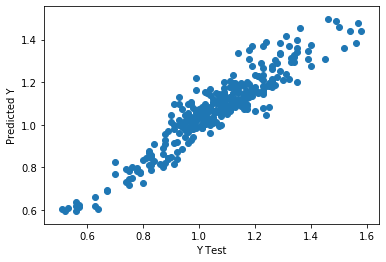

In [69]:
#plot of Y Test and Predicted Y
plt.scatter(x=y_test,y=y_predxg)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


Here we can see that we nearly have a straight line, in other words its better than the Linear regression model

In [70]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predxg})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
747,1.39,1.345961
1490,0.91,0.911888
426,1.07,1.134188
259,0.93,1.022839
156,1.14,1.160059
...,...,...
1039,0.83,0.853406
1129,1.34,1.316625
1162,0.88,0.908847
1200,1.03,1.022555


In [71]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(y_predxg)
df1.to_csv('Project8_avacado_task1_submission.csv',index=False)

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (AveragePrice) 

In [72]:
# Find feature importance of our best model
xg.feature_importances_

array([0.0943606 , 0.18925609, 0.06644444, 0.0663065 , 0.0664825 ,
       0.08342308, 0.04726827, 0.07977537, 0.13637473, 0.11183297,
       0.02955394, 0.02892151], dtype=float32)

In [73]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

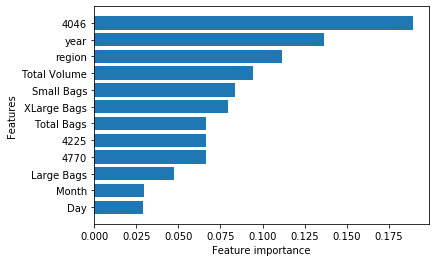

In [74]:
#bar plot of important features 
plot_features(x_train.columns, xg.feature_importances_)
#Looks like 4046 contribute the most in avacado dataset.

In [75]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(xg,'Project8_avacado_task1_submission.pkl')

['Project8_avacado_task1_submission.pkl']

In [76]:
#read the file using joblib
xg_from_joblib=joblib.load('Project8_avacado_task1_submission.pkl')
joblib_y_preds = xg_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

r2score: 87.12%
Mean absolute error: 0.05
Mean squared error: 0.00
Root Mean squared error: 0.07


{'r2score': 0.87,
 'Mean absolute error': 0.05,
 'Mean squared error': 0.0,
 'Root Mean squared error': 0.07}

# Modelling for task-2

In [77]:
# Split data into X and y
X1 = df.drop("region", axis=1)

y1 = df["region"]

In [78]:
# Independent variables (no target column)
X1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,7.608871,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,7.608871,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,7.608871,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,7.608871,6,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,7.608871,11,29


In [79]:
# Target variable
y1


0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [80]:
#checking shape of input variable
X1.shape

(1517, 12)

In [81]:
#checking shape of target variable
y1.shape

(1517,)

In [82]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x1=scale.fit_transform(X1)
x1=pd.DataFrame(x1,columns=X1.columns)
x1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.350481,-1.356762,-1.828162,-0.567524,-1.810613,-1.684725,-1.539248,-0.966743,-0.810775,-0.441008,1.624154,1.310530
1,1.456397,-1.466387,-2.012069,-0.684233,-1.737594,-1.620123,-1.474983,-0.953861,-0.810775,-0.441008,1.624154,0.529537
2,-0.767838,-0.932139,-1.941834,-0.159241,-1.428526,-1.732326,-1.587763,-0.937531,-0.810775,-0.441008,1.624154,-0.251456
3,0.026531,-1.212820,-1.790572,-0.403726,-1.654003,-1.977653,-1.838106,-0.862073,-0.810775,-0.441008,-0.104453,-0.363027
4,1.085691,-1.516851,-1.869374,-0.694856,-1.637471,-1.932480,-1.800022,-0.748414,-0.810775,-0.441008,1.336053,1.533671
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.668229,-0.598749,-0.109561,-0.547264,0.471494,-0.288452,-0.291023,0.408973,0.753079,2.267532,1.047952,0.083255
1513,2.303724,-0.646336,-0.230919,-0.592472,0.511204,-0.242463,-0.209250,0.354507,-0.810775,2.267532,0.759850,-0.586168
1514,2.144850,-0.645653,-0.201904,-0.584607,0.453477,-0.252693,-0.227507,0.342751,1.103891,2.267532,-1.256858,-0.586168
1515,2.091892,-0.605031,-0.135779,-0.576885,0.470688,-0.235255,-0.196878,0.343463,-0.810775,2.267532,0.759850,1.087389


In [83]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def maxrandomcore(model,x1,y1):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=acc_state,test_size=0.22,stratify=y1)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [84]:
# Evaluate the model on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "XGBClassifier":XGBClassifier(),
         }

# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        acc_state=maxrandomcore(model,x1,y1)
        x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=acc_state,test_size=.30)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [85]:
#learning scores of a model
model_scores = fit_and_score(models=models)

model_scores


max acc score corresponding to 62 is: 0.8293413173652695
max acc score corresponding to 90 is: 0.8982035928143712
max acc score corresponding to 70 is: 0.9760479041916168
max acc score corresponding to 49 is: 0.9161676646706587
max acc score corresponding to 65 is: 0.9281437125748503
max acc score corresponding to 46 is: 0.9161676646706587
max acc score corresponding to 82 is: 0.9281437125748503
max acc score corresponding to 71 is: 0.9700598802395209


{'Logistic Regression': 0.8435438265786993,
 'KNN': 0.8982092365692743,
 'Random Forest': 0.9971724787935909,
 'GaussianNB': 0.9132893496701225,
 'SVC': 0.9293119698397738,
 'DecisionTreeClassifier': 1.0,
 'GradientBoostingClassifier': 1.0,
 'XGBClassifier': 1.0}

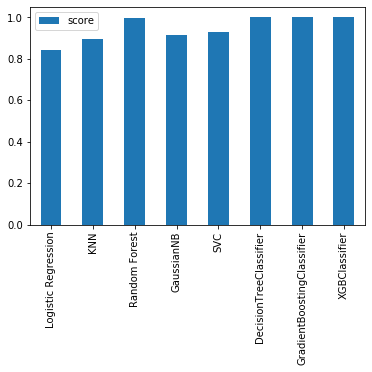

In [86]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [87]:
#Lists to store model name, Accuracy score, cross_val_score 
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("KNeighborClassifier",KNeighborsClassifier()))
models.append(("GaussianNB",GaussianNB()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("XG boost",XGBClassifier()))
Model=[]
score=[]
cvs=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    acc_state=maxrandomcore(model,x1,y1)
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=acc_state,test_size=0.22,stratify=y1)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x1,y1,cv=5,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))



******************** SVC *********************


max acc score corresponding to 65 is: 0.9281437125748503
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy Score= 0.9281437125748503


Cross_val_score= 0.8589089172373079


Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.75      1.00      0.86        12
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        17
           7       0.70      1.00      0.82         7
           8       1.00      1.00      1.00         5
           

max acc score corresponding to 82 is: 0.9251497005988024
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Accuracy Score= 0.9311377245508982


Cross_val_score= 0.8269587788087469


Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      0.83      0.83        12
    

max acc score corresponding to 62 is: 0.8293413173652695
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score= 0.8293413173652695


Cross_val_score= 0.7682399343299816


Classification report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.80      1.00      0.89        12
           2       0.92      0.86      0.89        14
           3       1.00      0.93      0.96        14
           4       1.00      0.57      0.73        14
           5       1.00      1.00      1.00        11
           6       0.81      1.00      0.89        17
           7       0.78      1.00      0.88         7
           8       1.00      1.

In [88]:
#lookover the accuracy_score,Cross_val_score,Roc_auc_curve in a DataFrame which we calculated above
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs})
result

,Model,accuracy_score,Cross_val_score
0,SVC,92.814371,85.890892
1,Random Forest,95.808383,90.404010
2,DecisionTree,89.820359,80.980157
3,GradientBoostingClassifier,93.113772,82.695878
4,KNeighborClassifier,89.820359,82.502284
5,GaussianNB,91.616766,84.488781
6,Logistic Regression,82.934132,76.823993
7,XG boost,97.005988,87.232335


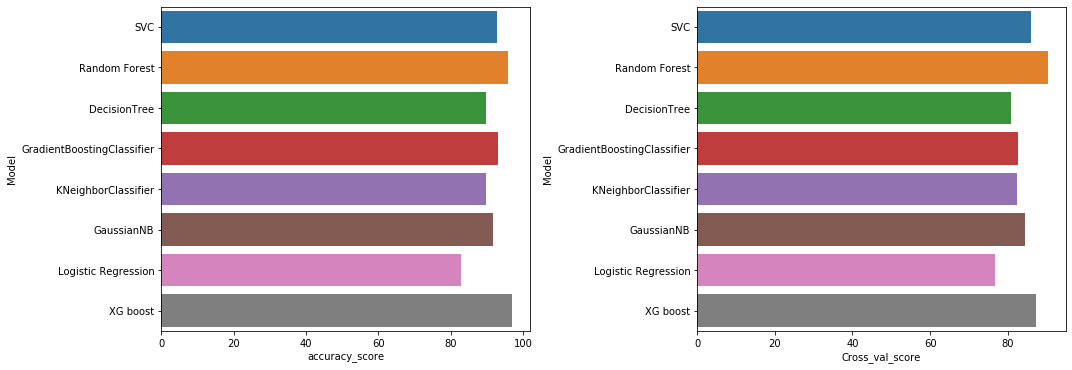

In [114]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'accuracy_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [89]:
#lets use gridsearchcv to find out best parameters for RandomForestClassifier
grid = {'n_estimators': [500, 1000, 1500],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x1, y1);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.8s
[CV] max_depth=None, max_feature

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   4.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   4.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   4.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   4.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   4.4s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   3.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   3.0s
[CV] max_depth=None, max_f

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   4.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   4.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.6s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   2.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   2.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   3.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   3.9s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.6s
[CV] max_depth=10, max_features=sqrt, min_samples_

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   4.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   3.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   4.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   4.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   3.9s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 14.7min finished


In [90]:
# best parameters for RandomForestClassifier
print("Best parameter:",gs_clf.best_params_)
print("score:",gs_clf.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1500}
score: 0.924851680949242


In [105]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestClassifier(n_estimators=1500,max_depth=None, min_samples_leaf= 1, max_features= 'auto',min_samples_split=4)
maxrandomcore(rf,x1,y1)

max acc score corresponding to 86 is: 0.9910179640718563


86

In [92]:
#lets use gridsearchcv to find out best parameters for XGBClassifier
grid_3 = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]
         }
clf = XGBClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x1, y1);

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [93]:
# best parameters for XGBClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
score: 0.35201054713249835


In [94]:
#checking accuracy score using best parameters which calculated from gridsearchCV
xg=XGBClassifier(colsample_bytree=0.7,learning_rate=0.05,max_depth= 6,min_child_weight= 11,missing=-999,n_estimators= 5,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 0.8)
maxrandomcore(xg,x1,y1)

max acc score corresponding to 91 is: 0.4251497005988024


91

In [95]:
#using AdaBoostClassifier base_estimator as rf
from sklearn.ensemble import AdaBoostClassifier
rf=RandomForestClassifier(n_estimators=500,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4,random_state=86)
ad = AdaBoostClassifier(base_estimator=rf)
ad.fit(x_train, y_train)
ad.score(x_train,y_train)
adpred=ad.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,adpred))
print('Confusion Matrix:',confusion_matrix(y_test,adpred))
print('Classification Report:',classification_report(y_test,adpred))


Accuracy Score: 0.9880239520958084
Confusion Matrix: [[15  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  6]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        17
           7       1.00      0.86      0.92         7
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         9
          1

# After all this process conclusion is that RandomForestClassifier is performing well.

In [106]:
#lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=86,test_size=0.22,stratify=y1)
rf=RandomForestClassifier(n_estimators=1500,max_depth=None, min_samples_leaf= 1, max_features= 'auto',min_samples_split=4)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
print("Classification model metrics on the test set:")
print(f"ACC: {accuracy_score(y_test, rfpred):.2f}")
print('Classification Report:',classification_report(y_test,rfpred))
#lets printed confusion_matrix
print(confusion_matrix(y_test, rfpred))

Classification model metrics on the test set:
ACC: 0.99
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        17
           7       0.88      1.00      0.93         7
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
  

In [107]:
# Printing predicted values
test=pd.DataFrame(data=y_test)
test['Predicted values']=rfpred
test
# On the lest side values are those fields which are taken by machine for test...

,region,Predicted values
149,3,3
367,12,12
1485,6,6
126,2,2
1195,48,48
...,...,...
307,10,10
788,31,31
553,22,22
639,25,25


In [108]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(rfpred)
df1.to_csv('Project8_avacado_task2_submission.csv',index=False)

# Feature importance


In [109]:
# Find feature importance of our best model
rf.feature_importances_

array([0.06055855, 0.11785477, 0.15269672, 0.13216084, 0.12810946,
       0.09967181, 0.09478845, 0.09916329, 0.06754087, 0.0255542 ,
       0.01115322, 0.01074781])

In [110]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

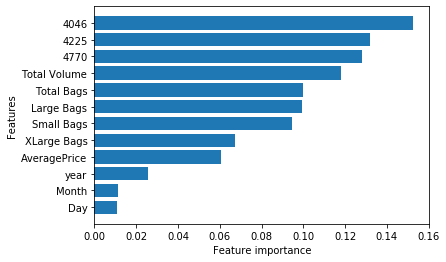

In [111]:
#bar plot of important features 
plot_features(x_train.columns, rf.feature_importances_)
#Looks like 4046 contribute the most in avacado dataset.

In [112]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(rf,'Project8_avacado_task2_submission.pkl')

['Project8_avacado_task2_submission.pkl']

In [113]:
#read the file using joblib
rf_from_joblib=joblib.load('Project8_avacado_task2_submission.pkl')
rf_from_joblib.predict(x_test)

array([ 3, 12,  6,  2, 48,  1,  3,  3,  0, 16,  4, 12, 25,  9, 36, 19, 31,
        0,  5, 37,  4, 10,  1, 19,  5, 26, 25, 46, 47,  2, 23, 27,  6, 39,
       13,  0, 15,  1,  3, 17,  5, 15, 38, 49,  3, 12, 34,  4, 32, 16, 28,
        6, 46,  6, 25,  9, 20, 45, 29, 44,  6, 48, 50, 15,  3,  9, 14, 48,
       47,  5,  2,  2, 33, 31,  6, 25,  2, 26,  2, 47, 26,  9,  6, 32,  0,
       38,  7,  5, 29,  0, 42,  1,  9,  5, 41, 31, 26, 21,  1,  0,  5, 37,
       38,  8, 24, 49,  6, 11, 12, 44, 22, 19, 31, 38, 32, 18,  7, 34, 28,
       43, 13,  3,  7,  4,  8,  1, 40, 31, 49,  2, 19, 13, 26,  6, 35, 22,
        4,  5,  6, 39, 39, 47, 34, 46, 44, 29, 28, 24, 17,  2, 50,  2, 10,
       34, 35, 28, 42, 28,  2, 47,  9, 33, 11, 26,  4, 36,  2, 50, 31,  7,
       28,  0, 42,  6, 29, 36,  1,  1,  7, 42,  4, 31, 44,  3,  6, 43, 23,
       31, 15,  2, 19, 18, 49, 38,  7, 41,  5, 32, 36,  3, 12, 17, 29,  6,
        4, 26, 44,  1, 42,  0,  5, 49, 22, 31,  2, 22, 34, 18, 41, 35, 16,
       20, 17, 30,  9,  7

# Conclusion